## EDA REVIEWS

In [2]:
#import csv file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

spotify_raw = pd.read_csv('SpotifyFeatures.csv')

#put the dataset into a dataframe
spotify_df = pd.DataFrame(spotify_raw)

#EDA - Exploratory Data Analysis
#view first 5 rows of the dataset
spotify_df.head()
#view last 5 rows of the dataset
spotify_df.tail()


genre               artist_name                      track_name  \
232720  Soul                     Slave                    Son Of Slide   
232721  Soul  Jr Thomas & The Volcanos                    Burning Fire   
232722  Soul              Muddy Waters  (I'm Your) Hoochie Coochie Man   
232723  Soul                   R.LUM.R                   With My Words   
232724  Soul            Mint Condition  You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479

In [3]:
# Translating ms to sn and dropping the original column
spotify_df['duration_sn'] = spotify_df['duration_ms'] / 1000
spotify_df = spotify_df.drop(columns=['duration_ms'])

In [4]:
# drop artist_name, track_name, and track_id columns
spotify_df = spotify_df.drop(columns=['artist_name', 'track_name', 'track_id'])

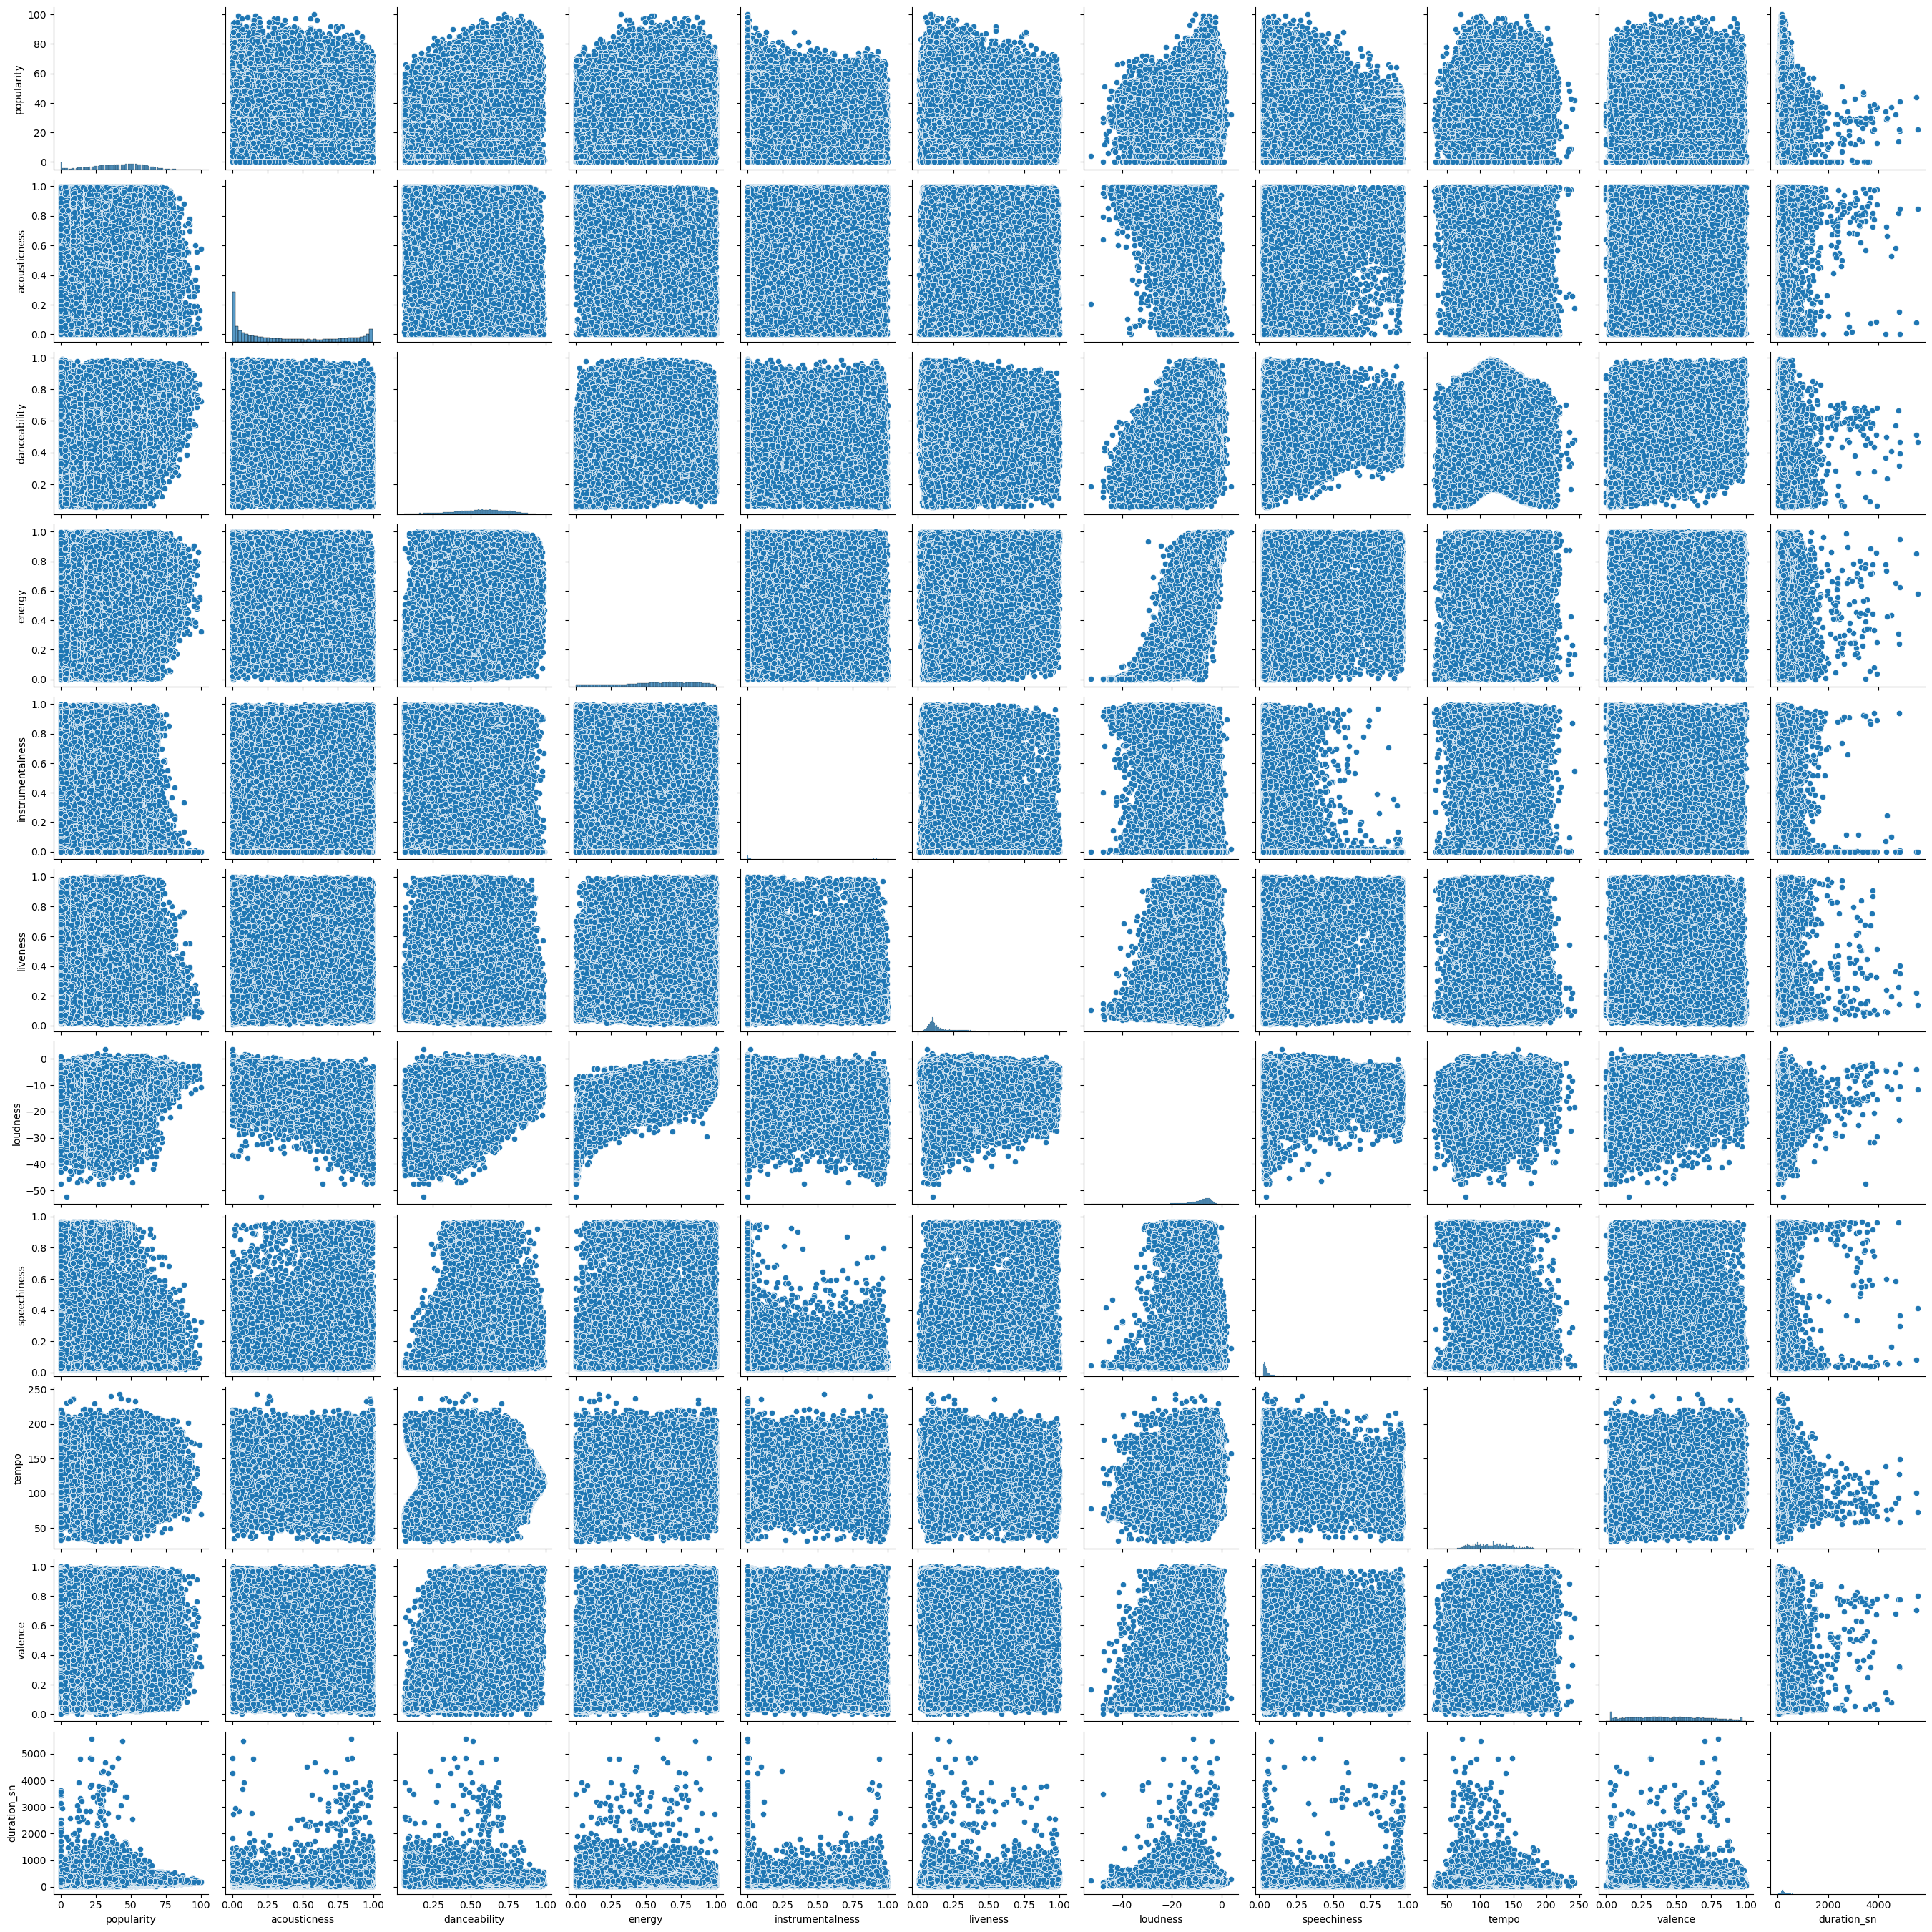

In [5]:
#show the relationship between different features
sns.pairplot(spotify_df)
plt.show()

In [6]:
#drop duplicates
spotify_df = spotify_df.drop_duplicates()

In [7]:
#Check missing values
spotify_df.isnull().sum()
spotify_df.head()

genre  popularity  acousticness  danceability  energy  instrumentalness  \
0  Movie           0         0.611         0.389   0.910             0.000   
1  Movie           1         0.246         0.590   0.737             0.000   
2  Movie           3         0.952         0.663   0.131             0.000   
3  Movie           0         0.703         0.240   0.326             0.000   
4  Movie           4         0.950         0.331   0.225             0.123   

  key  liveness  loudness   mode  speechiness    tempo time_signature  \
0  C#    0.3460    -1.828  Major       0.0525  166.969            4/4   
1  F#    0.1510    -5.559  Minor       0.0868  174.003            4/4   
2   C    0.1030   -13.879  Minor       0.0362   99.488            5/4   
3  C#    0.0985   -12.178  Major       0.0395  171.758            4/4   
4   F    0.2020   -21.150  Major       0.0456  140.576            4/4   

   valence  duration_sn  
0    0.814       99.373  
1    0.816      137.373  
2    0.368      170.267  
3    0.227      152.427  
4    0.390       82.625

In [8]:
import os

# Ensure the directory exists
os.makedirs("ML_Project", exist_ok=True)

# Save the CSV
spotify_df.to_csv("ML_Project/spotify_df.csv", index=False)

In [10]:


# Make a copy to avoid changing original df
df_corr = spotify_df.copy()

# Encode mode if not done already
df_corr['mode'] = df_corr['mode'].map({'Minor': 0, 'Major': 1})

# If you want, you can temporarily encode categorical features numerically for correlation
df_corr_encoded = pd.get_dummies(df_corr, columns=['genre', 'key', 'time_signature'], drop_first=True)

# Compute correlation with target
correlation = df_corr_encoded.corr()['popularity'].sort_values(ascending=False)

print(correlation)

popularity                1.000000
loudness                  0.363148
genre_Pop                 0.287059
danceability              0.257274
energy                    0.248895
genre_Rap                 0.216865
genre_Rock                0.207105
time_signature_4/4        0.206744
genre_Hip-Hop             0.193948
genre_Dance               0.174946
genre_Indie               0.154286
genre_Children’s Music    0.152213
genre_R&B                 0.123187
genre_Alternative         0.101638
genre_Folk                0.098773
tempo                     0.081362
genre_Soul                0.065301
valence                   0.060812
genre_Country             0.053661
key_C#                    0.047044
key_B                     0.036956
key_F#                    0.028585
key_G#                    0.025409
duration_sn               0.001943
genre_Jazz               -0.003529
key_E                    -0.006246
key_A#                   -0.010185
key_C                    -0.014902
key_F               

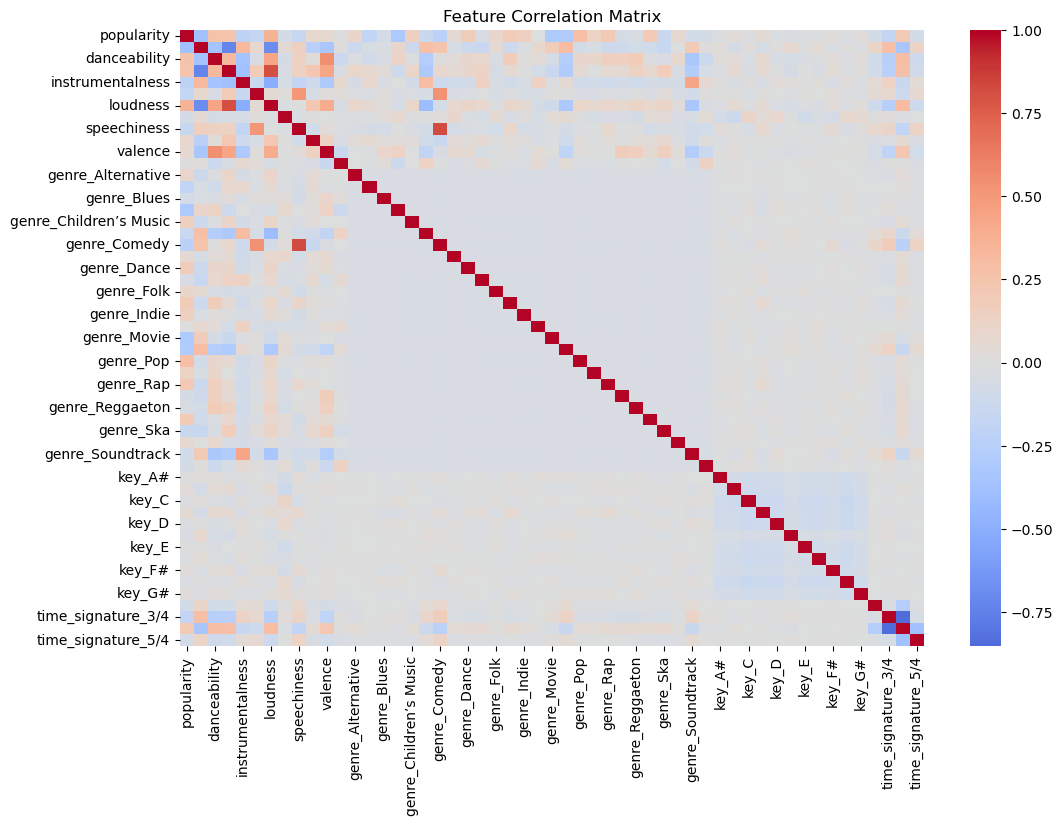

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df_corr_encoded.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Matrix")
plt.show()